In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(2023)

In [3]:
x = []
y = []
for i in range(1,11):
    x.append(i)
    y.append(4 * i + 7)

print(f"x : {x}")
print(f"y : {y}")

x : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y : [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


In [ ]:
reg = LinearRegression()

# (행, 열) - 1열로 변환
x = np.array(x).reshape(-1,1)

print(f"학습데이터 확인\nx : {x}\nx.shape : {x.shape}")

학습데이터 확인
x : [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape : (10, 1)


In [ ]:
reg.fit(x,y)

print(f'''기울기 및 절편 확인 coef = {reg.coef_}, intercept = {reg.intercept_}''')

coef_intercept = x * reg.coef_[0] + reg.intercept_
print(f"계산결과\n{coef_intercept}")
# coef_ -> coeffecient 계수 즉 기울기
# intercept -> 절편 or Bais

기울기 및 절편 확인 coef = [4.], intercept = 7.000000000000011
계산결과
[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


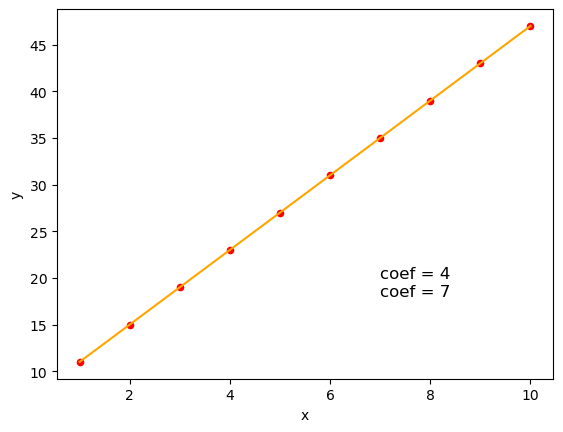

In [8]:
plt.scatter(x,y, color = 'r', s = 20)
plt.plot(x, coef_intercept,color = 'orange')
plt.text(7,20,'coef = %.0f'%reg.coef_[0], size = 12)
plt.text(7,18,'coef = %.0f'%reg.intercept_, size = 12)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [69]:
df = pd.read_csv("./data/국민건강보험공단_건강검진정보_20201231_수정.CSV", encoding="cp949")
pd.set_option('display.max_columns',None) # 디스플레이 옵션을 통한 전체 열 확장
df.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2020,2250657,41,2,13,160,55,76.0,1.0,1.0,1.0,1.0,130.0,82.0,98.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,46.0,77.0,62.0,1.0,0.0,0,NaN,NaN
1,2020,4699612,41,2,10,160,55,83.0,1.0,1.0,1.0,1.0,130.0,80.0,98.0,NaN,NaN,NaN,NaN,10.8,1.0,0.8,24.0,19.0,21.0,1.0,1.0,0,NaN,NaN
2,2020,4734684,41,1,9,180,100,101.5,1.0,1.0,1.0,1.0,130.0,90.0,103.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,23.0,21.0,23.0,1.0,1.0,0,NaN,NaN
3,2020,4450131,41,2,11,155,60,82.0,1.0,1.0,1.0,1.0,149.0,90.0,84.0,NaN,NaN,NaN,NaN,13.6,1.0,0.8,29.0,27.0,18.0,1.0,1.0,0,NaN,NaN
4,2020,1337937,41,2,10,155,50,73.0,1.0,1.0,1.0,1.0,129.0,80.0,104.0,NaN,NaN,NaN,NaN,11.8,1.0,0.8,32.0,33.0,11.0,1.0,0.0,0,NaN,NaN


In [70]:
print([x for x in df.columns])

['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석']


In [71]:
df.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '구강검진수검여부','치석', '치아우식증유무'],axis=1,inplace=True)

print("기준 칼럼 확인")
df.기준년도.value_counts()

기준 칼럼 확인


기준년도
2020    1000000
Name: count, dtype: int64

In [72]:
df["가입자일련번호"].value_counts()

가입자일련번호
2250657    1
3955841    1
3681129    1
4152992    1
792807     1
          ..
4433529    1
3932138    1
4990754    1
854014     1
3937733    1
Name: count, Length: 1000000, dtype: int64

In [75]:
df.drop(["가입자일련번호","기준년도","시도코드"],axis=1,inplace=True)


In [76]:
test = df[df['LDL콜레스테롤'].isnull()]

train = df.dropna(axis=0)
train.head()

,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
668672,1,9,175,65,80.0,114.0,72.0,98.0,178.0,95.0,47.0,112.0,14.5,1.0,0.6,19.0,16.0,22.0,1.0,1.0
668673,1,11,180,70,80.0,122.0,83.0,89.0,212.0,77.0,52.0,144.0,14.4,1.0,0.7,16.0,17.0,23.0,3.0,0.0
668674,1,16,165,60,80.0,134.0,71.0,159.0,148.0,53.0,49.0,88.0,15.1,1.0,0.8,24.0,17.0,14.0,1.0,0.0
668676,1,6,170,70,80.0,120.0,80.0,99.0,204.0,68.0,40.0,150.0,16.0,1.0,0.9,26.0,17.0,37.0,1.0,0.0
668677,2,11,160,65,80.0,106.0,67.0,82.0,180.0,146.0,50.0,100.0,14.1,1.0,0.8,22.0,17.0,14.0,3.0,0.0


In [77]:
y = train['LDL콜레스테롤']
x = train.drop('LDL콜레스테롤',axis=1)
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(216008, 19) (106392, 19) (216008,) (106392,)


In [79]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg.coef_,reg.intercept_)

[-1.52360278  0.03633774 -0.01721051  0.02787822  0.05975026 -0.00811572
 -0.01074764 -0.00354095  0.97010528 -0.17425623 -0.71322397  0.01556443
  0.05473113  0.1705697  -0.01326392  0.01472044 -0.00898432  0.0158597
 -0.83445166] -13.080229825510528


In [81]:
# 가중치 확인
for index, columns in enumerate(X_train.columns):
    print(f"{columns} = {reg.coef_[index]}")

성별 = -1.5236027809887291
연령대코드(5세단위) = 0.036337743250111534
신장(5cm단위) = -0.017210508307703976
체중(5kg단위) = 0.027878215637154636
허리둘레 = 0.05975026222295466
수축기혈압 = -0.008115715975756548
이완기혈압 = -0.010747638156977822
식전혈당(공복혈당) = -0.003540952607495285
총콜레스테롤 = 0.9701052847302365
트리글리세라이드 = -0.17425622701068522
HDL콜레스테롤 = -0.7132239725024788
혈색소 = 0.015564429078806782
요단백 = 0.05473112558514198
혈청크레아티닌 = 0.17056970028461288
혈청지오티(AST) = -0.013263919572050474
혈청지피티(ALT) = 0.014720443173095048
감마지티피 = -0.008984323575023904
흡연상태 = 0.015859703298501025
음주여부 = -0.8344516607419529


In [82]:
y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test,y_pred,squared=False)

print(rmse)

7.652906534238601


In [83]:
train.columns

Index(['성별', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

In [84]:
x = x.drop(['총콜레스테롤','트리글리세라이드', 'HDL콜레스테롤'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33,random_state=42)

lr = LinearRegression()
lr.fit(X_train, Y_train)

print(lr.coef_)
print(lr.intercept_)

[ 1.31954626e+01 -7.67846864e-01 -8.49630231e-02  1.20075698e-01
 -8.39032256e-02 -1.64323010e-01  3.22743292e-01 -1.30327191e-01
  4.48529407e+00 -1.34011728e+00  1.28461437e+00 -9.34352025e-02
  8.41508394e-02 -1.04691943e-02 -1.20878611e+00  7.23229615e-01]
65.82002185145366


In [85]:
y_pred = lr.predict(X_test)

In [87]:
for index, column in enumerate(X_train.columns):
    print(column,'=',reg.coef_[index])

성별 = -1.5236027809887291
연령대코드(5세단위) = 0.036337743250111534
신장(5cm단위) = -0.017210508307703976
체중(5kg단위) = 0.027878215637154636
허리둘레 = 0.05975026222295466
수축기혈압 = -0.008115715975756548
이완기혈압 = -0.010747638156977822
식전혈당(공복혈당) = -0.003540952607495285
혈색소 = 0.9701052847302365
요단백 = -0.17425622701068522
혈청크레아티닌 = -0.7132239725024788
혈청지오티(AST) = 0.015564429078806782
혈청지피티(ALT) = 0.05473112558514198
감마지티피 = 0.17056970028461288
흡연상태 = -0.013263919572050474
음주여부 = 0.014720443173095048


In [90]:
rsme_2 = mean_squared_error(Y_test,y_pred,squared=False)
print(round(rmse,3))
print(round(rsme_2,3))

7.653
38.011


##### 로지스틱 회귀 알고리즘
- sigmoid
$$
S(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^x + 1}
$$

In [95]:
# sigmoid 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))
test = np.array([-1,0,1])
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


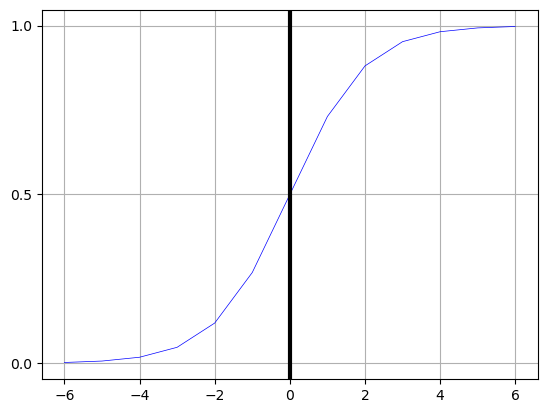

In [100]:
sigmoid_x = range(-6,7)
sigmoid_y = sigmoid(np.array(sigmoid_x))
plt.figure()
plt.plot(sigmoid_x,sigmoid_y,color = 'blue', linewidth = 0.5)
plt.rcParams['axes.grid'] = True
plt.axvline(x = 0, color = 'black', linewidth = 3)
plt.yticks([0,0.5,1])
plt.show()

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [26]:
x_train = np.array(range(3,18))
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
len(x_train)
len(y_train)

15

In [27]:
x_test = [0,1,2,18,19]
y_test = [0,0,0,1,1]

x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)

x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)


In [28]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
print(log_reg.coef_,log_reg.intercept_)

[[1.19383367]] [-11.34126808]


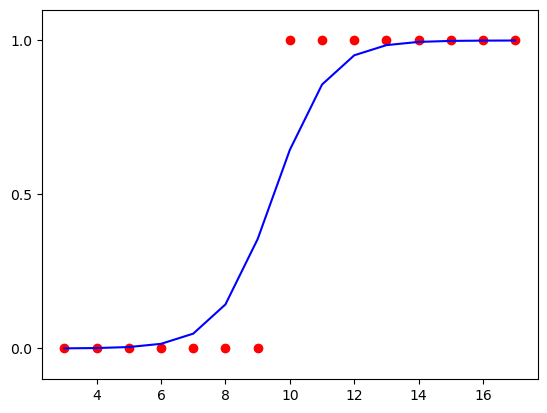

In [33]:
odd = []
for i in x_train:
    odd.append(log_reg.coef_*i + log_reg.intercept_)

sigmoid_y = sigmoid(np.array(odd))
sigmoid_y = sigmoid_y.reshape(-1,1)

plt.scatter(x_train, y_train,color = 'red')
plt.plot(np.array(x_train),sigmoid_y, color = 'blue')
plt.rcParams['axes.grid'] = True
plt.yticks([0,0.5,1])

plt.ylim([-0.1,1.1])
plt.show()

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_,lr.intercept_)


[0.1] -0.4666666666666669


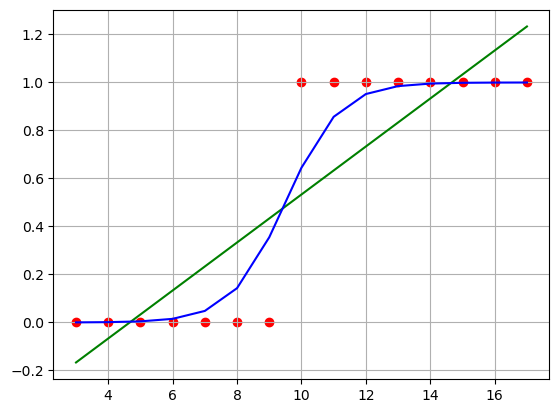

In [36]:
coef_intercept = x_train * lr.coef_ + lr.intercept_

plt.scatter(x_train, y_train, color = 'red')
plt.plot(np.array(x_train),coef_intercept, color = 'green')
plt.plot(np.array(x_train), sigmoid_y, color = 'blue')
plt.rcParams['axes.grid'] = True
plt.show()

In [37]:
log_pred = log_reg.predict(np.array(9.5).reshape(-1,1))
lr_pred = lr.predict(np.arange(9.5).reshape(-1,1))
print(log_pred)
print(lr_pred)

[1]
[-0.46666667 -0.36666667 -0.26666667 -0.16666667 -0.06666667  0.03333333
  0.13333333  0.23333333  0.33333333  0.43333333]


In [3]:
df = pd.read_csv("./data/국민건강보험공단_건강검진정보_20201231_수정.CSV",encoding = 'cp949')
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

In [4]:

sample_df = df[['신장(5cm단위)','성별','체중(5kg단위)', '음주여부']]

sample_df[:10]

,신장(5cm단위),성별,체중(5kg단위),음주여부
0,160,2,55,0.0
1,160,2,55,1.0
2,180,1,100,1.0
3,155,2,60,1.0
4,155,2,50,0.0
5,160,2,50,1.0
6,165,1,80,1.0
7,150,2,45,1.0
8,160,2,60,0.0
9,155,2,65,0.0


In [5]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   신장(5cm단위)  1000000 non-null  int64  
 1   성별         1000000 non-null  int64  
 2   체중(5kg단위)  1000000 non-null  int64  
 3   음주여부       999860 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


In [6]:
sample = sample_df.dropna()
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999860 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   신장(5cm단위)  999860 non-null  int64  
 1   성별         999860 non-null  int64  
 2   체중(5kg단위)  999860 non-null  int64  
 3   음주여부       999860 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [7]:
sample = sample.astype('str')
y = sample["음주여부"]
x= sample.drop('음주여부',axis=1)
y.value_counts()

음주여부
1.0    650181
0.0    349679
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=34)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1001, max_depth=2)

dt_model = dt.fit(x_train, y_train)

print(dt_model.score(x_train,y_train))
print(dt_model.score(x_valid,y_valid))

0.697857700078011
0.6973876342687977


In [46]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


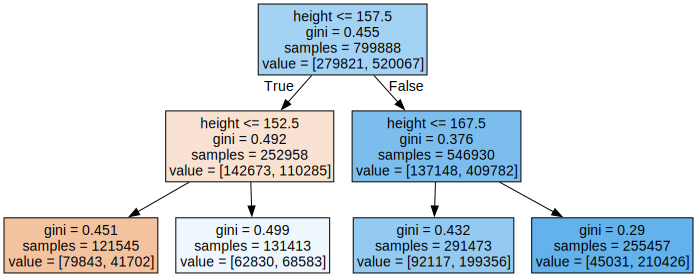

In [13]:
from sklearn.tree import export_graphviz
import graphviz
tree_graph = graphviz.Source(export_graphviz(
    dt_model,
    feature_names=["height","sex","weight"],
    impurity=True,
    filled=True
))

tree_graph

- Gini impuraty = gini
$$
gini = 1 - {p_0}^2 - {p_1}^2
$$
- class = 리스트 중 제일 큰 값
- 의사결정나무는 gini 값을 낮추는 것을 목표로 분기를 나눈다.

#

In [18]:
def gini(x):
    n = x.sum()
    gini_sum = 0
    for key in x.keys():
        gini_sum += (x[key]/n) * (x[key]/n)
    return 1 - gini_sum

fruit_1 = ['사과'] * 9
fruit_2 = ['사과'] * 2 + ['바나나'] * 4 + ['복숭아'] * 3
fruit_3 = ['사과'] * 4 + ['바나나'] * 2 + ['복숭아'] * 3
print(round(gini(pd.DataFrame(fruit_1).value_counts()),3))
print(round(gini(pd.DataFrame(fruit_2).value_counts()),3))
print(round(gini(pd.DataFrame(fruit_3).value_counts()),3))

0.0
0.642
0.642


In [20]:
dt_1 = DecisionTreeClassifier(
    max_depth=1,random_state=1001
)
dt_15 = DecisionTreeClassifier(
    max_depth=15,random_state=1001
)
dt_30 = DecisionTreeClassifier(
    max_depth=30,random_state=1001
)
dt_1.fit(x_train,y_train)
dt_15.fit(x_train,y_train)
dt_30.fit(x_train,y_train)
dt_mode_1 = dt_1.score(x_valid,y_valid)
dt_mode_15 = dt_15.score(x_valid,y_valid)
dt_mode_30 = dt_30.score(x_valid,y_valid)
print(dt_mode_1)
print(dt_mode_15)
print(dt_mode_30)

0.6897065589182485
0.7004030564278999
0.7004030564278999


In [21]:
dt_1 = DecisionTreeClassifier(
    max_features=1,random_state=1001
)
dt_15 = DecisionTreeClassifier(
    max_features=2,random_state=1001
)
dt_30 = DecisionTreeClassifier(
    max_features=3,random_state=1001
)
dt_1.fit(x_train,y_train)
dt_15.fit(x_train,y_train)
dt_30.fit(x_train,y_train)
dt_mode_1 = dt_1.score(x_valid,y_valid)
dt_mode_15 = dt_15.score(x_valid,y_valid)
dt_mode_30 = dt_30.score(x_valid,y_valid)
print(dt_mode_1)
print(dt_mode_15)
print(dt_mode_30)

0.7003930550277039
0.7004030564278999
0.7004030564278999


#### Ensemble
- 다수의 기본 모델을 합쳐 새로운 모델을 만드는 걸 의미함.
- 여러 모델을 합친 모델을 Ensemble Model 이라고 한다.
- 여기서 기본 모델은 결정 트리, 선형회귀, CNN 등등 여러 모델을 의미한다.

- 배깅(bagging) - (bootstrap aggregating) : 병렬
    - 학습할 데이터에서 n개의 부트스트랩 샘플링 데이터를 만들고 이 데이터 학습을 진행, 이후 배깅을 실행(소프트 or 하드)
- 보팅(Voting) : 병렬
    - n개로 구성된 보깅 모델이 a개의 모델에 대해 전부 예측을 시키고 최빈값을 정답으로 출력
    - 하드 보팅, 소프트 보팅이 있다. (2개의 차이는?) 소프트는 예측 확률의 평균을 구해 정답을 추론, 하드는 선택 기반(가장 많은 선택 수)
- 부스팅(boosting) : 순차
    - 예측력이 약한 모델을 순차적으로 연결한 방식
    - n개의 모델에 동일한 가중치 부여 -> 학습 데이터를 훈련 -> 오차가 큰 모델은 가충치는 높게 부여, 낮은 모델은 낮게 부여 -> 학습 데이터에서 샘플링 데이터를 구함 여러번 반복(아마 하이퍼파라미터) -> n개의 모델의 가중치의 평균으로 정답을 추론

In [8]:
from tensorflow.keras.datasets.mnist import load_data

(x_train,y_train),(x_test,y_test) = load_data()
print(x_train.shape)

X_train = x_train.reshape(-1,784)
X_test = x_test.reshape(-1,784)
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

print(acc_train_dct)
print(acc_test_dct)


1.0
0.8781


In [10]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [11]:
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test, y_test)

In [12]:
print(acc_train_rfc)
print(acc_test_rfc)

1.0
0.9705


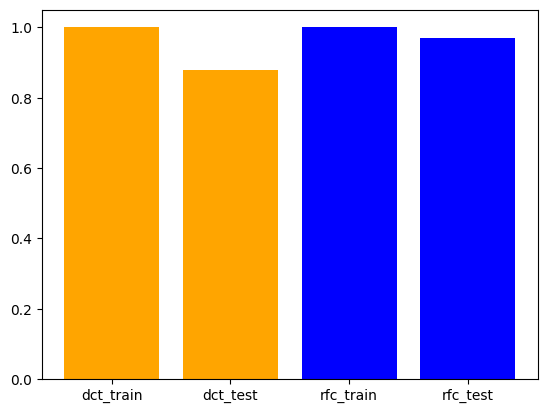

In [15]:
import matplotlib.pyplot as plt

acc_list_x = ['dct_train','dct_test','rfc_train','rfc_test']
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]

colors = ['orange','orange','blue','blue']

plt.bar(acc_list_x,acc_list_y,color = colors)
plt.show()

In [17]:
rfc = RandomForestClassifier(
    random_state=0,
    # 나무개수
    n_estimators = 1,
    # 의사결정나무 기준으로 변경하기
    max_features=40,
    bootstrap=False
    )
rfc.fit(X_train,y_train)

acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test, y_test)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)
print(acc_train_rfc,acc_test_rfc)
print(acc_train_dct,acc_test_dct)

1.0 0.8507
1.0 0.8781


In [18]:
rfc = RandomForestClassifier(
    random_state=0,
    # 나무개수
    n_estimators = 1,
    # 의사결정나무 기준으로 변경하기
    max_features=60,
    bootstrap=False
    )
rfc.fit(X_train,y_train)

acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test, y_test)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)
print(acc_train_rfc,acc_test_rfc)
print(acc_train_dct,acc_test_dct)

1.0 0.8587
1.0 0.8781


In [19]:
rfc = RandomForestClassifier(
    random_state=0,
    # 나무개수
    n_estimators = 1,
    # 의사결정나무 기준으로 변경하기
    max_features=50,
    bootstrap=False
    )
rfc.fit(X_train,y_train)

acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test, y_test)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)
print(acc_train_rfc,acc_test_rfc)
print(acc_train_dct,acc_test_dct)

1.0 0.8496
1.0 0.8781


##### 그레디언트 부스팅 (Gradient boosting)
- 부스팅 방식을 사용한 알고리즘으로 순차적인 방법으로 인해 배깅 방식보다 훈련이 오래 걸린다는 단점이 있다. 하지만 이전 모델에 대해 훈련하는 거기 때문에 성능은 더 좋은 경우가 많다. 하지만 트리 기반 특성상 고차원 희소 데이터에는 잘 작동하지 않는다는 단점이 존재.

##### 학습률 (Learning rate)
- 보통 0 ~ 1사이 값을 사용하고 낮으면 학습이 느리지만 오래 기억한다는 장점이 있고 높으면 학습은 빠르지만 빨리 잊어버린다는 단점이 있다.

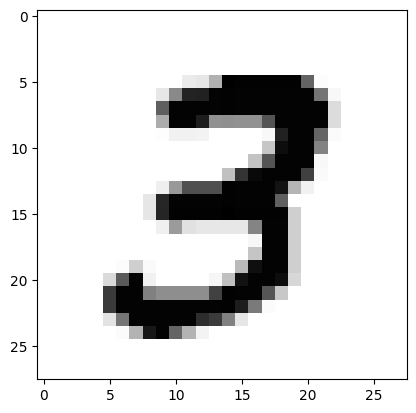

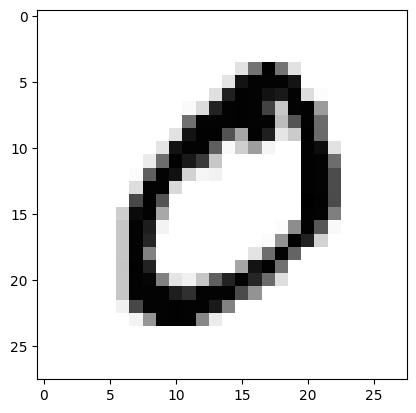

In [22]:
(x_train,y_train),(x_test,y_test) = load_data()

x_train = x_train[:2000]
x_test = x_test[:2000]
y_train = y_train[:2000]
y_test = y_test[:2000]

plt.imshow(x_train[7],cmap='Greys')
plt.show()

plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [ ]:
X_train = x_train.reshape(-1,784)
X_test = x_test.reshape(-1,784)

from sklearn.ensemble import GradientBoostingClassifier

dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train,y_train)

acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train,y_train)
acc_train_gbc = gbc.score(X_train,y_train)
acc_test_gbc = gbc.score(X_test,y_test)

print("dct")
print(acc_train_dct, acc_test_dct)
print('-' * 10)
print("rfc")
print(acc_train_rfc, acc_test_rfc)
print('-' * 10)
print("gbc")
print(acc_train_gbc, acc_test_gbc)
print('-' * 10)

dct
1.0 0.6525
----------
rfc
1.0 0.8745
----------
gbc
1.0 0.828
----------


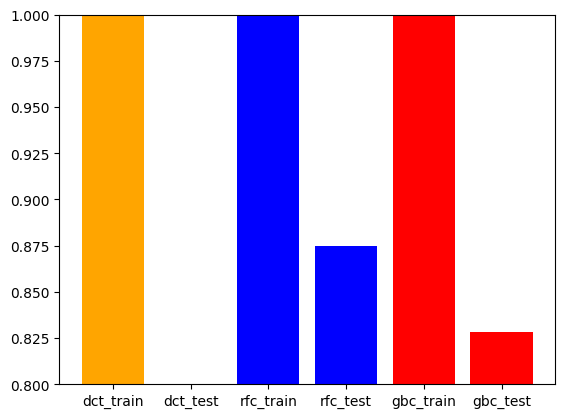

In [ ]:
acc_list_x = ['dct_train', 'dct_test', 'rfc_train','rfc_test', 'gbc_train', 'gbc_test']
acc_list_y = [acc_train_dct ,acc_test_dct ,acc_train_rfc ,acc_test_rfc ,acc_train_gbc ,acc_test_gbc]

colors = ['orange','orange','blue','blue','red','red']
plt.bar(acc_list_x,acc_list_y,color = colors)
plt.ylim(0.8,1.0)
plt.show()

#### 딥러닝으로 AI 모델링하기

1. 인공신경망 (ANN : Artificial Neural Network)
    - 인간의 신경망의 뉴런 중 수상돌기들이 자극을 받아 세포핵에서 신호를 생성하며 축삭돌기로 전달, 이 과정을 컴퓨터 알고리즘으로 구현한 것
    - w : 가중치, b : 바이어스 이 2개를 조절하며 최적의 값을 찾아간다.
    1. Weight(가중치) 와 bias(편향)
        - 가중치와 편향을 조절하며 결과를 도출하기 위한 최적의 값을 찾아가면서 학습한다.
        - 가중치의 영향이 크기 때문에 편향을 적절히 조절하면서 가중합을 찾아나간다.
    $$
    \text{가중합} = \sum_{i = 1}^{k}w_i * x_i + b
    $$
2. 활성화 함수 (Activate function)
    1. Sigmoid
    $$
        \text{sigmoid(x)} = \frac{1}{1 + e^{-x}}
    $$
        

    2. tanh
        - sigmoid 가 은닉층에서 제대로 학습이 되지 않는 단점을 보완하기 위해 사용하였다. 범위는 -1 ~ 1로 미분값이 커졌으나 기울기 소실이 발생하는 문제가 있다.
    $$
    tanh(x) = \frac{\sinh x}{\cosh x} = \frac{e^x - e^{-x}}{e^x + e^{-x}}
    $$
    3. ReLU (Rectified Linear Unit)
        - ReLU는 tanh가 가지는 기울기 소실(Grediant Vanishing)의 문제를 해결하기 위해 제안되었으며 입력값이 양수일 경우 미분값은 항상 1이나 음수의 경우 값을 회생시키지 못한다.
    $$
    \text{ReLU(x)} = max(0,x) = \begin{cases}{0\quad if x < 0}\\{x \quad if x >= 0}\end{cases}
    $$
    4. Leaky ReLU
        - ReLU의 단점을 보완하기 위해 나온 함수로 음수 입력시 가중치를 곱해 아주 작은 값로 만듬. 0 이하에서도 가중치가 사라지지 않아 기울기 소실 문제를 해결할 수 있다.
    $$
    \text{Leaky ReLU{x}} = max(ax, x) = \begin{cases}{ax\quad if x < 0}\\{x\quad if x >= 0}\end{cases}
    $$
    5. softmax
        - 소프트맥스는 n개 입력 당 출력이 n개 이다.
        - 입력값을 정규화 해주는 함수로 입력시 전체 합이 1인 확률을 출력하고 이중 가장 큰 값이 출력값이 된다.
    $$
    \text{softmax(x)} = \sum_{j = 1}^{k}e^{z_i}
    $$

    3. 심층 신경망 (Deep Neural Network)
    - 입력층(input layer)와 출력층(output layer) 사이에 여러 개의 은닉층(hidden layer)가 있는 신경망 알고리즘 의미함.
        1. 가중치 표기법
        $$
        {w^l_{ij}}
        $$
        - l 은 l층의 가중치
        - i 는 다음층의 i번째 뉴런
        - j 는 l층의 j번째 뉴런
        2. 순전파 (Foward propagation)
            - 샘플을 입력층에서 시작해서 샘플의 패턴을 신경망으로 전달하면서 계산을 수행하는 과정
        3. 은닉층의 공식
        $$
        h = f(Wx +b)
        $$
        - f : 활성화 함수 (Ex. ReLU, softmax..)
        - W : 각 뉴런층의 가중치 행렬
        - b : 편향 벡터
        - x : 입력 벡터

            <img src="./img/DNN.png" width="300"/>

        - $z_1 = x_1 * W_1 + x_2 * w_3$
        - $z_2 = x_1 * W_2 + x_2 * w_4$
        - $z_1, z_2$의 값이 h1,h2 즉 은닉층의 입력으로 들어가게 된다.
        - $h_1 = f(z_1)$
        - $h_2 = f(z_2)$
        - 이런 방식으로 계속 다음 층으로 넘어가면서 계산을 하는 것이다.